In [7]:
print(1)

1


In [8]:
import json
params={
    'symbol':'1245',
    'type':'limit'
}
with open('params.json','w') as fout:
    params_str=json.dump(params,fout)
with open('params.json','r') as fin:
    origin_params=json.load(fin)
print (params_str)
print ('type of original_params={}'.format(type(origin_params)))

None
type of original_params=<class 'dict'>


In [9]:
sqared=map(lambda x:x**2,[1,2,3,4])
print(sqared)

In [10]:
class Count:
    def __init__(self,func):
        self.func=func
        self.num.calls=0
    def __call__(self, *args, **kwargs):
        self.num_calls+=1
        print('111')
        return self.func(*args,**kwargs)
@Count
def example():
    print("11112323232")
    example

<class 'AttributeError'>: 'Count' object has no attribute 'num'

In [11]:
def index_normal(L,target):
    result=[]
    for i,num in enumerate(L):
        if num ==target:
            result.append(i)
    return result
print(index_normal([1,6,2,4,5,2,8,6,3,2],2))

[2, 5, 9]


In [37]:
import requests
import pandas as pd
import re
import time
import csv
# 网页解析
from bs4 import BeautifulSoup
import os
# 请求网址
from urllib import request

# url请求文件头
header = {'Content-Type': 'text/html; charset=utf-8',
          'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36'}

# 登录cookies
Cookie = {'Cookie':'ll="118373"; bid=nwUzagXYPW0; __yadk_uid=6Acgns8MqIiVX8xdeR9XdvZpeZvyU70n; _vwo_uuid_v2=DA4FF1A9A542C586225D4F1CACD8FC1A2|a655a1bb3709fcf4e62213c6e574c19e; __gads=ID=bc89a11f4804e4d2-2224f02426c60020:T=1614221468:RT=1614221468:S=ALNI_MZuqSQCNFE-Xy2UlpFwBX1rX5jbnw; _vwo_uuid_v2=DA4FF1A9A542C586225D4F1CACD8FC1A2|a655a1bb3709fcf4e62213c6e574c19e; __utma=30149280.1421230719.1614221458.1617012037.1617347693.6; __utmc=30149280; __utmz=30149280.1617347693.6.5.utmcsr=baidu|utmccn=(organic)|utmcmd=organic; __utmc=223695111; _pk_ref.100001.4cf6=%5B%22%22%2C%22%22%2C1617347695%2C%22https%3A%2F%2Fwww.douban.com%2F%22%5D; _pk_ses.100001.4cf6=*; ap_v=0,6.0; __utmb=30149280.3.10.1617347693; __utma=223695111.243723590.1614221458.1617347695.1617347921.6; __utmb=223695111.0.10.1617347921; __utmz=223695111.1617347921.6.5.utmcsr=baidu|utmccn=(organic)|utmcmd=organic; _pk_id.100001.4cf6=4453b42a3b7f578e.1614221457.5.1617348789.1617007153.'}

# 构造请求网址
url_1 = "https://movie.douban.com/subject/34779692/comments?start="
'''
https://movie.douban.com/subject/34779692/comments?limit=20&status=P&sort=new_score
https://movie.douban.com/subject/34779692/comments?start=20&limit=20&status=P&sort=new_score
https://movie.douban.com/subject/34779692/comments?start=40&limit=20&status=P&sort=new_score
'''
url_2 = "&limit=20&sort=new_score&status=P"

# 循环抓取多页，循环变量为start,0,20,40...
i = 0

while True:
    # 拼接url
    # 当i=0时
    url = url_1+str(i*20)+url_2
    try:
        # request请求
        html = requests.get(url, headers=header, cookies=Cookie)
        # Beautifulsoup解析网址
        soup = BeautifulSoup(html.content, 'lxml')

        # 爬取的数据
        # 评论时间
        # 找span标签，找span标签中的class的comment-time
        comment_time_list = soup.find_all('span', attrs={'class': 'comment-time'})
        # 设置循环终止变量
        # 当评论为0时，就结束循环
        if len(comment_time_list) == 0:
            break
        # 评论用户名
        use_name_list = soup.find_all('span', attrs={'class': 'comment-info'})
        # 评论文本
        comment_list = soup.find_all('span', attrs={'class': 'short'})
        # 评分
        rating_list = soup.find_all('span', attrs={'class': re.compile(r"allstar(\s\w+)?")})

        for r in range(len(comment_time_list)):
            data1 = [
                (comment_time_list[r].string,
                 # 评论用户名，下的a标签，
                use_name_list[r].a.string,
                comment_list[r].string,
                rating_list[r].get('class')[0],
                rating_list[r].get('title'))
            ]
            data2 = pd.DataFrame(data1)
            # 存储为douban_movie.csv
            data2.to_csv('douban_movie.csv', header=False, index=False, mode='a+', encoding="utf-8-sig")
        print('page '+str(i+1)+' has done')
    except:
        # 如出现异常，则出现something is wrong
        print("something is wrong")
    i = i+1
    time.sleep(3)



https://movie.douban.com/subject/34779692/comments?start=0&limit=20&sort=new_score&status=P
[<span class="comment-info">
<a class="" href="https://www.douban.com/people/69274288/">普通的雪花</a>
<span>看过</span>
<span class="allstar30 rating" title="还行"></span>
<span class="comment-time" title="2021-02-13 21:10:46">
                    2021-02-13 21:10:46
                </span>
<span class="comment-location"></span>
</span>, <span class="comment-info">
<a class="" href="https://www.douban.com/people/W3IQ7/">20个小明≯</a>
<span>看过</span>
<span class="allstar20 rating" title="较差"></span>
<span class="comment-time" title="2021-02-06 15:57:44">
                    2021-02-06 15:57:44
                </span>
<span class="comment-location"></span>
</span>, <span class="comment-info">
<a class="" href="https://www.douban.com/people/48953772/">Xaviera</a>
<span>看过</span>
<span class="allstar30 rating" title="还行"></span>
<span class="comment-time" title="2021-02-06 17:47:47">
                    2021-0

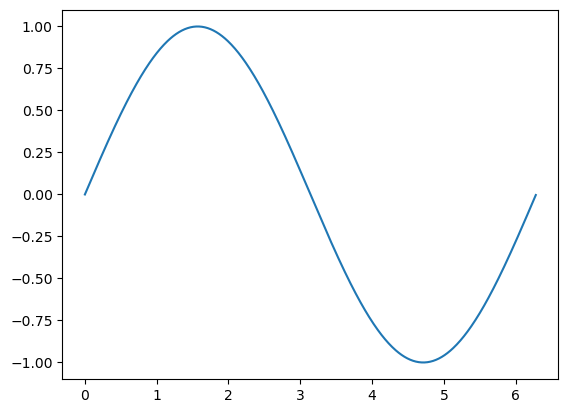

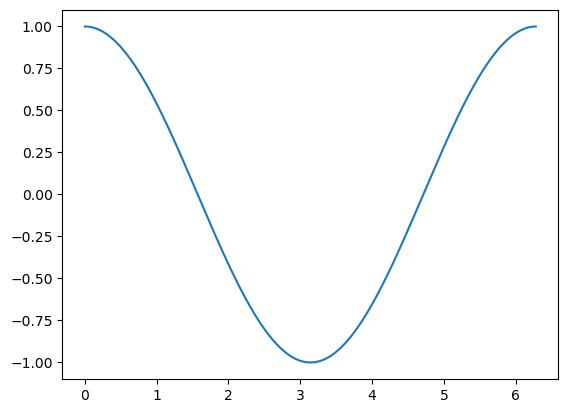

In [13]:
 import numpy as np
 import matplotlib.pyplot as plt
 x=np.arange(0,2*np.pi,0.01)
 y=np.sin(x)
 plt.plot(x,y)
 plt.show()
 #%%
 y1=np.cos(x)
 plt.plot(x,y1)
 plt.show()


In [14]:
myList = [21,22,23,24,25,26,27,28,29]
mylist1= myList
mylist1+myList

[21, 22, 23, 24, 25, 26, 27, 28, 29, 21, 22, 23, 24, 25, 26, 27, 28, 29]

In [29]:
myList = [21,22,23,24,25,26,27,28,29]
mylist1=myList
mylist1.append(myList)
mylist1

[21, 22, 23, 24, 25, 26, 27, 28, 29, [...]]

In [26]:
[type(item) for item in [True,"1",1,1,0]]

[bool, str, int, int, int]

In [30]:
range(10)

range(0, 10)

In [31]:
list("chall")

['c', 'h', 'a', 'l', 'l']

In [34]:
i=0
sum=0
myList = [21,22,23,24,25,26,27,28,29]
[value+i  for i, value in myList]

<class 'TypeError'>: cannot unpack non-iterable int object

In [36]:
mytl=42,3,4,5
print(sorted(mytl))

[3, 4, 5, 42]


In [37]:
s='a\tbbc'

In [38]:
print(s)

a	bbc


In [53]:
def myfunc(i,f=2):
    f=i+1
    return i,f
a,b =myfunc(3)
a,b

pydev debugger: Unable to find real location for: C:/Users/slgwin10/AppData/Local/Temp/xpython_1644/2701471466.py


(3, 4)

In [43]:
try:
    f=open('myfile.txt','w')
    while True:
        x=input("请输入一个整数")
        if x.upper()=='Q':break
        y=100/int(x)
        f.write(str(y)+'/n')
except ZeroDivisionError:
    print("zerodivision错误")
except ValueError:
    print('value错误')
finally:
    f.close()

In [45]:
%xmode Plain
x=2
x1

Exception reporting mode: Plain


<class 'NameError'>: name 'x1' is not defined

In [3]:
a=1
b=0
assert b!=0,"不能为0"
print(b)

<class 'AssertionError'>: 不能为0

In [4]:
name ="chao"
age=18
"{}"
f'{name}is{age}years old'

'chaois18years old'

In [7]:
import pandas as pd
mySeries=pd.Series([21,22,23,24,25,26,27],index=["a","b","c","d","e","f","g"])
mySeries1=mySeries.reindex(index=["b","c","e","d","g","f"])
mySeries2=mySeries1.rename([4,3,23,4,5,6])
mySeries1
mySeries2

<class 'TypeError'>: Series.name must be a hashable type

In [16]:
import numpy as np
import pandas as pd
myarr = np.array([1,2,3,4,5,6,7,8,9,10])
myarr.resize(2,5)
df1=pd.DataFrame(np.arange(10).reshape(2,5))
myarr
df1

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9


In [28]:
df2=pd.read_csv("douban_movie.csv",header=None)
#df2=df2[1]
#d2.drop([3,4],axis=0,inplace=True)   #axis 列单位计算，逐列计算 inplace=true实时计算
df2[df2[4]=="推荐"].head()

,0,1,2,3,4
2,\n 2021-02-12 15:18:23\n ...,二熊的三十,龙王死的太随便了,allstar40,推荐
3,\n 2021-02-09 23:32:50\n ...,内陆飞鱼,《新神榜：哪吒重生》这个改编蛮大胆的，把传统神话故事放在近现代的场域里，机甲、机车、赛车、废...,allstar40,推荐
7,\n 2021-02-06 20:39:04\n ...,DEPARTURES,追光的白蛇画面真的算国内顶尖了，剧情嘛，希望比白蛇有进步，看完，我仿佛看了破产版海王，画面特...,allstar40,推荐
8,\n 2021-02-06 16:55:29\n ...,女神的秋裤,真神仙打架，特效很不错，动作戏很精彩，盖住了故事和剧情上的短板，配乐也有点拉垮。无奈和《哪吒...,allstar40,推荐
10,\n 2021-02-09 18:08:43\n ...,盲忙,惊喜之作！这种看似“怪力乱炖”的风格或许会让很多人感到冒犯，但在汇集了经典改编、神话、黑帮、...,allstar40,推荐


<class 'KeyError'>: "None of [Index(['id', 'name', '评分', 'pinf', 'ces?'], dtype='object')] are in the [columns]"

In [30]:
from pyspark.sql import SparkSession
SparkSession .__doc__

'The entry point to programming Spark with the Dataset and DataFrame API.\n\n    A SparkSession can be used create :class:`DataFrame`, register :class:`DataFrame` as\n    tables, execute SQL over tables, cache tables, and read parquet files.\n    To create a :class:`SparkSession`, use the following builder pattern:\n\n    .. autoattribute:: builder\n       :annotation:\n\n    Examples\n    --------\n    >>> spark = SparkSession.builder \\\n    ...     .master("local") \\\n    ...     .appName("Word Count") \\\n    ...     .config("spark.some.config.option", "some-value") \\\n    ...     .getOrCreate()\n\n    >>> from datetime import datetime\n    >>> from pyspark.sql import Row\n    >>> spark = SparkSession(sc)\n    >>> allTypes = sc.parallelize([Row(i=1, s="string", d=1.0, l=1,\n    ...     b=True, list=[1, 2, 3], dict={"s": 0}, row=Row(a=1),\n    ...     time=datetime(2014, 8, 1, 14, 1, 5))])\n    >>> df = allTypes.toDF()\n    >>> df.createOrReplaceTempView("allTypes")\n    >>> spark

In [32]:
mySpark = SparkSession.builder\
    .appName('My_App')\
    .master('local')\
    .getOrCreate()
#此处是本地模式加载集群
#SPark UI 为 http://localhost:4040/jobs

In [33]:
mySpark

In [34]:
myDF = mySpark.range(1,100).toDF("number").where("number %2=0").sort("number")
myDF

DataFrame[number: bigint]

In [7]:
Tempturestr=input('请输入')
if Tempturestr[-1]in['F','f']:
    C=(eval(Tempturestr[0:-1])-32)/1.8
f'返回的温度{C:.2f}'

pydev debugger: Unable to find real location for: C:/Users/slgwin10/AppData/Local/Temp/xpython_9160/2728549979.py


'返回的温度43.89'

In [41]:
from bs4 import BeautifulSoup
import  requests
import re



# header = {'Content-Type': 'text/html; charset=utf-8',
#           'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
#           'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36 Edg/111.0.1661.62'}
# Cookie = {'Cookie':' acw_tc=ac11000116806779155894964e00e0fe0dd51f3119ccca8a0573d29ac75cc8; privacy=1680677915; guid=65ddccf825df62d2775560fb579f67b7; sajssdk_2015_cross_new_user=1; sensorsdata2015jssdkcross=%7B%22distinct_id%22%3A%221875035cc8d2b9-0fd2473769fb5e-7a545474-921600-1875035cc8e6cc%22%2C%22first_id%22%3A%22%22%2C%22props%22%3A%7B%22%24latest_traffic_source_type%22%3A%22%E7%9B%B4%E6%8E%A5%E6%B5%81%E9%87%8F%22%2C%22%24latest_search_keyword%22%3A%22%E6%9C%AA%E5%8F%96%E5%88%B0%E5%80%BC_%E7%9B%B4%E6%8E%A5%E6%89%93%E5%BC%80%22%2C%22%24latest_referrer%22%3A%22%22%7D%2C%22identities%22%3A%22eyIkaWRlbnRpdHlfY29va2llX2lkIjoiMTg3NTAzNWNjOGQyYjktMGZkMjQ3Mzc2OWZiNWUtN2E1NDU0NzQtOTIxNjAwLTE4NzUwMzVjYzhlNmNjIn0%3D%22%2C%22history_login_id%22%3A%7B%22name%22%3A%22%22%2C%22value%22%3A%22%22%7D%2C%22%24device_id%22%3A%221875035cc8d2b9-0fd2473769fb5e-7a545474-921600-1875035cc8e6cc%22%7D'}

url = 'https://cn.58.com/dog/52708992254086x.shtml?iuType=supplementinfolist_1&showTags=W3siaWQiOjE0NzQ5NywibmFtZSI6IuazsOi_queGiiIsInNob3dTdHlsZVR5cGUiOiJCQVNFX1NUWUxFIiwic29ydCI6MCwidGFnVHlwZSI6IklORk9fVEFHIn0seyJpZCI6MjgzNzMsIm5hbWUiOiLkuKrkuroiLCJzaG93U3R5bGVUeXBlIjoiQkFTRV9TVFlMRSIsInNvcnQiOjAsInRhZ1R5cGUiOiJJTkZPX1RBRyJ9XQ&listTitle=5pyJ5Y-q54uX54uX5LiA6LW35YW7&picUrlAndTag=W3sicGljVXJsIjoiaHR0cHM6Ly9waWM0LjU4Y2RuLmNvbS5jbi9wMS9zbWFsbC9uX3YyMDViNDk0MjQ4YmI4NDZkMmEyNDk3Y2RjZmUyZDA3ZmEucG5nIiwidGFnSWRUeXBlIjoidGFnIn1d&link_abtest=lbgpcnokey_A,virtualCatePcAB_B,vcateComplexLabelAB_B&busTransInfo=%7B%22transInfo%22%3A%22hjhEu4eouwoofxeKuPR5qpQlq3UEk7TlRxUOq4SEulQ6RxUA%5E7FNf7ZXfxZ-uloo%22%7D&psid=160838407220290040057382424&entinfo=52708992254086_b&pagesource=832%2C252&slot=-1&PGTID=0d3000fc-008d-2df6-bd4f-9069980f0b98&ClickID=3'
s= requests.session()
s.keep_alive = False
requests.adapters.DEFAULT_RETRIES= 5
 # request请求
wb_data=requests.get(url)
# html = requests.get(url, headers=header, cookies=Cookie,timeout=300)
 # Beautifulsoup解析网址
soup = BeautifulSoup(wb_data.text, 'lxml')
print(soup)
#title = soup.title.text
price = soup.select('.price')
# price = soup.find_all('span', attrs={'class': 'danwei'})
#print(title)
print(price)

<!DOCTYPE html>
<html lang="en">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>58同城</title>
<link href="data:;base64,=" rel="icon"/>
<link href="//c.58cdn.com.cn/ui6/topbar404.css" rel="stylesheet" type="text/css"/>
<link href="//c.58cdn.com.cn/ui6/list/newmincity404.css" rel="stylesheet" type="text/css"/>
<link href="/easyui/easyui.css" rel="stylesheet" type="text/css"/>
<script>try{var ____json4fe = {catentry:{dispid:'',name:'',listname:'city'},locallist:{dispid:'0',name:'',listname:''},modules:'404'};____json4fe.version = 'A';____json4fe.start = (new Date()).getTime();}catch(e){};</script>
<script src="//j2.58cdn.com.cn/js/jquery-1.8.3.js"></script>
<script src="//j1.58cdn.com.cn/js/404/topbar404.js" type="text/javascript"></script>
<script src="/easyui/jquery.easyui.min.js" type="text/javascript"></script>
<style type="text/css">
body,h1,h2,dl,dt,dd,p {
 margin: 0px;
 padding: 0px;
}

dd {
 list-style: none
}

a {
 text-decoration: none;
}

.cle

In [46]:
'hello'.upper().lower()

'hello'

In [56]:
import  os
myfile =['accounts.text','te.cxv']
os.path.abspath('.') #绝对地址
#os.makedirs('C:\\ds') 创建文件夹

'D:\\pythonProject'